In [30]:
# 导入第三方包
import pandas as pd
import numpy as np
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import linear_model, datasets
raw_i = pd.read_csv('/mnt/nas/ai-project-data/pingping/concat/Bindingdb2022_IC50_cleaned_new.csv')
raw_k = pd.read_csv('/mnt/nas/ai-project-data/pingping/concat/Bindingdb2022_Ki_cleaned.csv')

In [31]:
raw_i=raw_i[['UID','REG_LABEL']]

In [32]:
raw_i

,UID,REG_LABEL
0,Br/C(=C/c1ccccc1)/C=NNC(=O)c1cccs1_P42574,4.50030
1,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N_P17861,5.00000
2,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N_Q13285,5.43835
3,Br/C(=C\c1ccccc1)/c1ccc(cc1)C(C1C(=O)CC(CC1=O)...,4.45100
4,Br/C=C/1\C(=O)N2C1S(=O)(=O)CC(=C2C(=O)OC(c1ccc...,2.47370
...,...,...
843362,s1[nH]c2c(n1)c1nc(nc1cc2)C1CC1_Q9Y6Q9,5.85565
843363,s1ccc(c1)c1cnc2n1cc(nc2)c1ccco1_P06241,5.20410
843364,s1ccc(c1)c1cnc2n1cc(nc2)c1cccs1_P06241,5.64800
843365,s1ccc(c1)c1nc(NC2Cc3c(C2)cccc3)c2c(n1)cccc2_P0...,8.18050


In [33]:
raw_k=raw_k[['UID','REG_LABEL']]

In [34]:
raw_k=raw_k.rename(columns={'REG_LABEL':'Ki_REG_LABEL'})

In [35]:
raw=pd.merge(raw_i, raw_k, how='left', on='UID')

In [36]:
raw

,UID,REG_LABEL,Ki_REG_LABEL
0,Br/C(=C/c1ccccc1)/C=NNC(=O)c1cccs1_P42574,4.50030,NaN
1,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N_P17861,5.00000,NaN
2,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N_Q13285,5.43835,NaN
3,Br/C(=C\c1ccccc1)/c1ccc(cc1)C(C1C(=O)CC(CC1=O)...,4.45100,NaN
4,Br/C=C/1\C(=O)N2C1S(=O)(=O)CC(=C2C(=O)OC(c1ccc...,2.47370,NaN
...,...,...,...
843362,s1[nH]c2c(n1)c1nc(nc1cc2)C1CC1_Q9Y6Q9,5.85565,NaN
843363,s1ccc(c1)c1cnc2n1cc(nc2)c1ccco1_P06241,5.20410,NaN
843364,s1ccc(c1)c1cnc2n1cc(nc2)c1cccs1_P06241,5.64800,NaN
843365,s1ccc(c1)c1nc(NC2Cc3c(C2)cccc3)c2c(n1)cccc2_P0...,8.18050,NaN


In [37]:
raw.isnull().sum()

UID                  0
REG_LABEL            0
Ki_REG_LABEL    819856
dtype: int64

In [38]:
raw = raw.dropna(subset = ['Ki_REG_LABEL'])

In [39]:
raw

,UID,REG_LABEL,Ki_REG_LABEL
108,BrC=Cc1cn(c(=O)[nH]c1=O)[C@@H]1O[C@@H]([C@H]([...,4.3665,4.98300
269,BrCCCCCN1N=C(c2ccc(c(c2)OC)OC)C2C(C1=O)CC=CC2_...,8.6383,8.63830
289,BrCCCOC(=O)[C@@]12CCC(C[C@H]2C2=CC[C@H]3[C@@](...,4.5061,4.45780
293,BrCCCSc1nc(ccc1CNC(=O)C(c1ccc(c(c1)F)NS(=O)(=O...,7.1675,8.15490
299,BrCCCc1onc(n1)c1ccc(cc1)Br_Q8IXJ6,5.8239,5.65755
...,...,...,...
843240,n1ccc(cc1)c1nc2c([nH]1)cccc2_Q16512,4.3416,4.65050
843241,n1ccc(cc1)c1nc2c([nH]1)cccc2_Q16513,5.1129,5.41450
843292,n1ccc(cc1)c1scc(n1)c1cccnc1_P11511,8.3979,10.22180
843311,n1ccc(nc1)c1cnc(nc1c1ccco1)Nc1cccnc1_P29275,6.4810,7.76960


In [40]:
raw=raw[['REG_LABEL','Ki_REG_LABEL']]

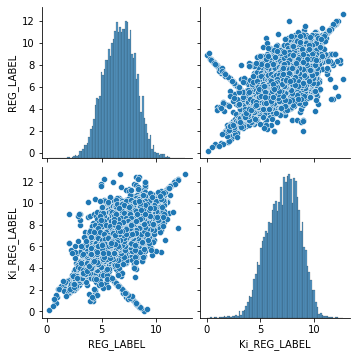

In [12]:
raw.describe()
sns.pairplot(raw)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(raw, train_size = 0.8, random_state=1234)
Train,Test

(        REG_LABEL  Ki_REG_LABEL
 372715     5.0458       5.46850
 297324     7.3665       8.54845
 738711     6.0458       7.95860
 266952     6.9813       6.85835
 209444     4.2218       4.74470
 ...           ...           ...
 300804     9.2366       8.95860
 834066     3.6021       3.61980
 815019     7.9208       4.42250
 617327     7.4318       7.82390
 47089      8.8165       8.47370
 
 [18808 rows x 2 columns],
         REG_LABEL  Ki_REG_LABEL
 523716     6.1688        6.4145
 139846     6.7305        6.2218
 362519     7.7447        9.6990
 24734      5.0132        5.1938
 663446     7.7212        7.9586
 ...           ...           ...
 301396     4.2800        4.4300
 470573     6.7447        6.4522
 809912     8.4793        9.2218
 530019     7.1549        7.0809
 737365     5.2125        5.0899
 
 [4703 rows x 2 columns])

In [14]:
import statsmodels.formula.api as smf 
fit_train = smf.ols('REG_LABEL~Ki_REG_LABEL' , data = raw).fit()
fit_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              REG_LABEL   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 4.304e+04
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:24:18   Log-Likelihood:                -29757.
No. Observations:               23511   AIC:                         5.952e+04
Df Residuals:                   23509   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3498      0.026     51.791      0.000       1.299       1.401
Ki_REG_LABEL     0.7410      0.004    207.451      0.000       0.734       0.748
==============================================================================
Omnibus:                     3001.273   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26052.882
Skew:                           0.316   Prob(JB):                         0.00
Kurtosis:                       8.118   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei


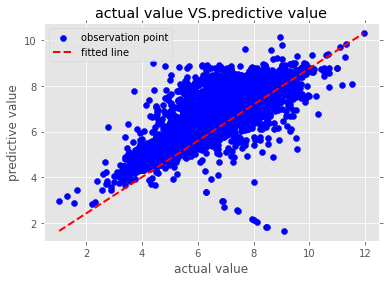

In [15]:
# 真实值与预测值的关系# 设置绘图风格
plt.style.use('ggplot')
 
# 设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
fit_test = smf.ols('REG_LABEL~Ki_REG_LABEL' , data = Test).fit()
# 散点图
plt.scatter(Test.REG_LABEL, fit_test.predict(), label = 'observation point',c='blue')
# 回归线
plt.plot([Test.REG_LABEL.min(), Test.REG_LABEL.max()], [fit_test.predict().min(), fit_test.predict().max()], 'r--', lw=2, label = 'fitted line')
 
# 添加轴标签和标题
plt.title('actual value VS.predictive value')
plt.xlabel('actual value')
plt.ylabel('predictive value')
 
# 去除图边框的顶部刻度和右边刻度
plt.tick_params(top = 'off', right = 'off')
# 添加图例
plt.legend(loc = 'upper left')
# 图形展现
plt.savefig('/mnt/nas/ai-project-data/pingping/concat/ic_ki_all.png',dpi=500,bbox_inches = 'tight')#高清保存图片
plt.show()


In [16]:
data=pd.read_csv('/mnt/nas/ai-project-data/pingping/concat/Bindingdb2022_Ki_cleaned.csv').iloc[:,1:]
data['REG_LABEL'] = data['REG_LABEL'].apply(lambda x: round(0.7410*x+1.3498, 4))

In [17]:
data['REG_LABEL']

0         5.3836
1         5.2139
2         4.2448
3         7.7800
4         6.8746
           ...  
330561    7.1860
330562    5.9218
330563    5.9739
330564    6.4172
330565    5.9959
Name: REG_LABEL, Length: 330566, dtype: float64

In [18]:
data

,UID,values,REG_LABEL,COMPOUND_SMILES,PROTEIN_SEQUENCE,UNIPROT_ID,INCHI_KEY,Target Source,DOI
0,Br/C=C(\[C@H]1OC([C@@H]([C@@H]1O)O)n1cnc2c1ncn...,[5.4437],5.3836,Br/C=C(\[C@H]1OC([C@@H]([C@@H]1O)O)n1cnc2c1ncn...,MSDKLPYKVADIGLAAWGRKALDIAENEMPGLMRMRERYSASKPLK...,P23526,OBQVXHUDZXGPIH-KMADMOBVSA-N,Homo sapiens,10.1021/jm9801410
1,Br/C=C/1\CC(C(=O)O1)C/C=C/c1ccccc1_P09211,[5.2147],5.2139,Br/C=C/1\CC(C(=O)O1)C/C=C/c1ccccc1,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,P09211,OREYREHQUZBVOB-NJPWYCGFSA-N,NaN,10.1021/jm0499615
2,Br/C=C/1\CC(C(=O)O1)c1ccccc1_P09211,[3.9069],4.2448,Br/C=C/1\CC(C(=O)O1)c1ccccc1,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,P09211,CSSUBLBHWCCATP-VQHVLOKHSA-N,NaN,10.1021/jm0499615
3,Br/C=C/1\Oc2ccc(cc2-c2c1c1C(=CC(Nc1cc2)(C)C)C)...,[8.6778 8.6778],7.7800,Br/C=C/1\Oc2ccc(cc2-c2c1c1C(=CC(Nc1cc2)(C)C)C)F,MTELKAKGPRAPHVAGGPPSPEVGSPLLCRPAAGPFPGSQTSDTLP...,P06401,NGNZPJWDMRRGGD-YVLHZVERSA-N,NaN,10.1016/s0960-894x(03)00255-5
4,Br/C=C/CO[C@@H](c1nnc(o1)c1ccc(cc1)C(C)(C)C)[C...,[7.4559],6.8746,Br/C=C/CO[C@@H](c1nnc(o1)c1ccc(cc1)C(C)(C)C)[C...,MALSIKEDFSSAFAKNESAVNSSTFNNNMKTWKIQKRFQILYVFFF...,P39898,RMTQJSAOWJWUPX-MNSGAQFXSA-N,Plasmodium falciparum,10.1021/jm050463l
...,...,...,...,...,...,...,...,...,...
330561,o1cc(c(c1)CCNc1c2CCCCc2nc2c1cccc2)CCNc1c2CCCCc...,[7.8761],7.1860,o1cc(c(c1)CCNc1c2CCCCc2nc2c1cccc2)CCNc1c2CCCCc...,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,P22303,UFCRJTDWAAXRMD-UHFFFAOYSA-N,Homo sapiens,10.1021/jm701253t
330562,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1_P0DMS8,[6.1701],5.9218,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1,MPNNSTALSLANVTYITMEIFIGLCAIVGNVLVICVVKLNPSLQTT...,P0DMS8,SSBDAIJNJZAUPA-UHFFFAOYSA-N,Homo sapiens,10.1016/j.bmc.2007.10.103
330563,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1_P29274,[6.2403],5.9739,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1,MPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVV...,P29274,SSBDAIJNJZAUPA-UHFFFAOYSA-N,Homo sapiens,10.1016/j.bmc.2007.10.103
330564,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1_P29275,[6.8386],6.4172,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1,MLLETQDALYVALELVIAALSVAGNVLVCAAVGTANTLQTPTNYFL...,P29275,SSBDAIJNJZAUPA-UHFFFAOYSA-N,Homo sapiens,10.1016/j.bmc.2007.10.103


In [19]:
ic50h=pd.read_csv('/mnt/nas/ai-project-data/pingping/concat/Bindingdb2022_IC50_cleaned_new.csv')


In [20]:
ic50h

,UID,values,REG_LABEL,COMPOUND_SMILES,PROTEIN_SEQUENCE,UNIPROT_ID,INCHI_KEY,Target Source,DOI
0,Br/C(=C/c1ccccc1)/C=NNC(=O)c1cccs1_P42574,[4.5003],4.50030,Br/C(=C/c1ccccc1)/C=NNC(=O)c1cccs1,MENTENSVDSKSIKNLEPKIIHGSESMDSGISLDNSYKMDYPEMGL...,P42574,XZRHAUPXEHCGFW-UFFLFGQOSA-N,Homo sapiens,NaN
1,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N_P17861,[5.],5.00000,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N,MVVVAAAPNPADGTPKVLLLSGQPASAAGAPAGQALPLMVPAQRGA...,P17861,ASTHOWUTDWXZAK-UNGMXIRPSA-N,Homo sapiens,NaN
2,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N_Q13285,[5.4985 5.3782],5.43835,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N,MDYSYDEDLDELCPVCGDKVSGYHYGLLTCESCKGFFKRTVQNNKH...,Q13285,ASTHOWUTDWXZAK-UNGMXIRPSA-N,Homo sapiens,NaN
3,Br/C(=C\c1ccccc1)/c1ccc(cc1)C(C1C(=O)CC(CC1=O)...,[4.451],4.45100,Br/C(=C\c1ccccc1)/c1ccc(cc1)C(C1C(=O)CC(CC1=O)...,matykvrvatgtdllsgtrdsisltivgtqgeshkqllnhfgrdfa...,O75342,WWWCQVXPDKJHPI-HMAPJEAMSA-N,Homo sapiens,10.1080/14756360701408754
4,Br/C=C/1\C(=O)N2C1S(=O)(=O)CC(=C2C(=O)OC(c1ccc...,[2.4737],2.47370,Br/C=C/1\C(=O)N2C1S(=O)(=O)CC(=C2C(=O)OC(c1ccc...,MTLGRRLACLFLACVLPALLLGGTALASEIVGGRRARPHAWPFMVS...,P08246,WCVPYABWVPWVJL-XDHOZWIPSA-N,Homo sapiens,10.1021/jm970351x
...,...,...,...,...,...,...,...,...,...
843362,s1[nH]c2c(n1)c1nc(nc1cc2)C1CC1_Q9Y6Q9,[5.7894 5.9219],5.85565,s1[nH]c2c(n1)c1nc(nc1cc2)C1CC1,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,Q9Y6Q9,KEKDTXLRDCPUEJ-UHFFFAOYSA-N,Homo sapiens,NaN
843363,s1ccc(c1)c1cnc2n1cc(nc2)c1ccco1_P06241,[5.2041],5.20410,s1ccc(c1)c1cnc2n1cc(nc2)c1ccco1,MGCVQCKDKEATKLTEERDGSLNQSSGYRYGTDPTPQHYPSFGVTS...,P06241,VKUHPNJIMXYTHY-UHFFFAOYSA-N,NaN,NaN
843364,s1ccc(c1)c1cnc2n1cc(nc2)c1cccs1_P06241,[5.648],5.64800,s1ccc(c1)c1cnc2n1cc(nc2)c1cccs1,MGCVQCKDKEATKLTEERDGSLNQSSGYRYGTDPTPQHYPSFGVTS...,P06241,RQIJUPJJTZXZCP-UHFFFAOYSA-N,NaN,NaN
843365,s1ccc(c1)c1nc(NC2Cc3c(C2)cccc3)c2c(n1)cccc2_P0...,[8.284 8.0506 8.284 8.1805 8.0506 8.284 8.1...,8.18050,s1ccc(c1)c1nc(NC2Cc3c(C2)cccc3)c2c(n1)cccc2,MEFSSPSREECPKPLSRVSIMAGSLTGLLLLQAVSWASGARPCIPK...,P04062,JCDASFBLAYXAIQ-UHFFFAOYSA-N,Homo sapiens,NaN


In [21]:
ic50h=pd.read_csv('/mnt/nas/ai-project-data/pingping/concat/Bindingdb2022_IC50_cleaned_new.csv')
#添加列名
# ic50h.columns = ['UID', 'values','REG_LABEL','COMPOUND_SMILES','PROTEIN SEQUENCE','UNIPROT_ID','INCHI_KEY']#原文件没有变
frames = [ic50h, data]

 
b = pd.concat(frames,axis=0)     #合并
b.to_csv( "/mnt/nas/ai-project-data/pingping/concat/Bindingdb2022_expend_all_ic50.csv", index=False, encoding='utf-8-sig')    #存档

In [22]:
b.shape

(1173933, 9)

In [23]:
from sklearn import linear_model, datasets

Estimated coefficients (true, linear regression, RANSAC):
[0.74103477] [0.79036009]


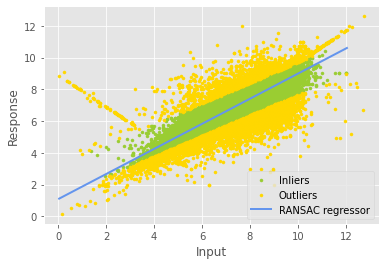

In [24]:
X=raw['Ki_REG_LABEL'].values.reshape(-1,1)
y=raw['REG_LABEL'].values

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
# plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.savefig('/mnt/nas/ai-project-data/pingping/concat/ic_ki_all_r.png',dpi=500,bbox_inches = 'tight')#高清保存图片

plt.show()


In [25]:
ransac.score(line_X,line_y)#m模型拟合得分

0.9954010589667155

In [26]:
print(ransac.estimator_.coef_[0])
print(ransac.estimator_.intercept_)

0.7903600911639548
1.0878231605760789


In [41]:
data=pd.read_csv('/mnt/nas/ai-project-data/pingping/concat/Bindingdb2022_Ki_cleaned.csv').iloc[:,1:]
data['REG_LABEL'] = data['REG_LABEL'].apply(lambda x: round(0.7953*x+0.9471, 4))

In [42]:
ic50h=pd.read_csv('/mnt/nas/ai-project-data/pingping/concat/Bindingdb2022_IC50_cleaned_new.csv')
#添加列名
# ic50h.columns = ['UID', 'values','REG_LABEL','COMPOUND_SMILES','PROTEIN SEQUENCE','UNIPROT_ID','INCHI_KEY']#原文件没有变
frames = [ic50h, data]

 
b = pd.concat(frames,axis=0)     #合并
b.to_csv( "/mnt/nas/ai-project-data/pingping/concat/Bindingdb2022_expend_all_ic50_r.csv", index=False, encoding='utf-8-sig')    #存档

In [29]:
b

,UID,values,REG_LABEL,COMPOUND_SMILES,PROTEIN_SEQUENCE,UNIPROT_ID,INCHI_KEY,Target Source,DOI
0,Br/C(=C/c1ccccc1)/C=NNC(=O)c1cccs1_P42574,[4.5003],4.50030,Br/C(=C/c1ccccc1)/C=NNC(=O)c1cccs1,MENTENSVDSKSIKNLEPKIIHGSESMDSGISLDNSYKMDYPEMGL...,P42574,XZRHAUPXEHCGFW-UFFLFGQOSA-N,Homo sapiens,NaN
1,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N_P17861,[5.],5.00000,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N,MVVVAAAPNPADGTPKVLLLSGQPASAAGAPAGQALPLMVPAQRGA...,P17861,ASTHOWUTDWXZAK-UNGMXIRPSA-N,Homo sapiens,NaN
2,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N_Q13285,[5.4985 5.3782],5.43835,Br/C(=C\c1ccccc1)/C=Nn1nnnc1N,MDYSYDEDLDELCPVCGDKVSGYHYGLLTCESCKGFFKRTVQNNKH...,Q13285,ASTHOWUTDWXZAK-UNGMXIRPSA-N,Homo sapiens,NaN
3,Br/C(=C\c1ccccc1)/c1ccc(cc1)C(C1C(=O)CC(CC1=O)...,[4.451],4.45100,Br/C(=C\c1ccccc1)/c1ccc(cc1)C(C1C(=O)CC(CC1=O)...,matykvrvatgtdllsgtrdsisltivgtqgeshkqllnhfgrdfa...,O75342,WWWCQVXPDKJHPI-HMAPJEAMSA-N,Homo sapiens,10.1080/14756360701408754
4,Br/C=C/1\C(=O)N2C1S(=O)(=O)CC(=C2C(=O)OC(c1ccc...,[2.4737],2.47370,Br/C=C/1\C(=O)N2C1S(=O)(=O)CC(=C2C(=O)OC(c1ccc...,MTLGRRLACLFLACVLPALLLGGTALASEIVGGRRARPHAWPFMVS...,P08246,WCVPYABWVPWVJL-XDHOZWIPSA-N,Homo sapiens,10.1021/jm970351x
...,...,...,...,...,...,...,...,...,...
330561,o1cc(c(c1)CCNc1c2CCCCc2nc2c1cccc2)CCNc1c2CCCCc...,[7.8761],7.21100,o1cc(c(c1)CCNc1c2CCCCc2nc2c1cccc2)CCNc1c2CCCCc...,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,P22303,UFCRJTDWAAXRMD-UHFFFAOYSA-N,Homo sapiens,10.1021/jm701253t
330562,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1_P0DMS8,[6.1701],5.85420,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1,MPNNSTALSLANVTYITMEIFIGLCAIVGNVLVICVVKLNPSLQTT...,P0DMS8,SSBDAIJNJZAUPA-UHFFFAOYSA-N,Homo sapiens,10.1016/j.bmc.2007.10.103
330563,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1_P29274,[6.2403],5.91000,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1,MPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVV...,P29274,SSBDAIJNJZAUPA-UHFFFAOYSA-N,Homo sapiens,10.1016/j.bmc.2007.10.103
330564,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1_P29275,[6.8386],6.38580,o1ccc(c1)COc1nc2ccccc2n2c1nc(n2)c1ccco1,MLLETQDALYVALELVIAALSVAGNVLVCAAVGTANTLQTPTNYFL...,P29275,SSBDAIJNJZAUPA-UHFFFAOYSA-N,Homo sapiens,10.1016/j.bmc.2007.10.103
